<a href="https://colab.research.google.com/github/MahadevaswamyJG/python-practice-codes/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from zipfile import ZipFile
# file_name = "/content/emojis.zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print("Done")
# with ZipFile("/content/test.zip", 'r') as zip:
#   zip.extractall()
#   print("Done")
with ZipFile("/content/train.zip", 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [24]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit( # Use fit instead of fit_generator
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.2434 - loss: 1.8271 - val_accuracy: 0.3465 - val_loss: 1.6907
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 162us/step - accuracy: 0.3750 - loss: 1.6068 - val_accuracy: 0.4000 - val_loss: 1.7108
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - accuracy: 0.3492 - loss: 1.6552 - val_accuracy: 0.4028 - val_loss: 1.5536
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 152us/step - accuracy: 0.3125 - loss: 1.7048 - val_accuracy: 0.5000 - val_loss: 1.4995
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - accuracy: 0.4087 - loss: 1.5386 - val_accuracy: 0.4389 - val_loss: 1.4762
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 139us/step - accuracy: 0.5312 - loss: 1.4104 - val_accuracy: 0.4000 - val_loss: 1.4994
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.4366 - loss: 1.4682 - val_accuracy: 0.4579 - val_loss: 1.4150
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5156 - loss: 1.3773 - val_accuracy: 0.4000 - val_loss: 1.4532
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.4588 - loss: 1.4143 - val_accuracy: 0.4860 - val_loss: 1.3695
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.4219 - loss: 1.5265 - val_accuracy: 

In [16]:
#Saving the model
emotion_model.save('model.h5')

In [17]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [18]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [36]:
from IPython.display import display, Javascript
from google.colab import files

# Call files.upload() directly instead of using the 'file' variable
uploaded = files.upload()

# Get the filename from the uploaded files
filename = next(iter(uploaded))

# Now you can use 'filename' to refer to the uploaded file
print(f"Uploaded file: {filename}")

Saving Mahadevaswamy.png to Mahadevaswamy.png
Uploaded file: Mahadevaswamy.png


In [35]:
upload()

AttributeError: 'str' object has no attribute 'upload'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


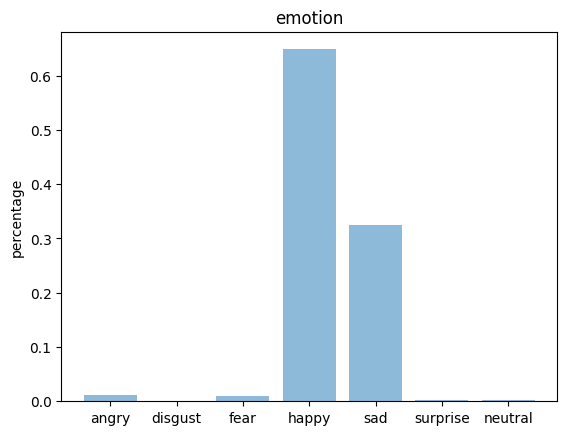

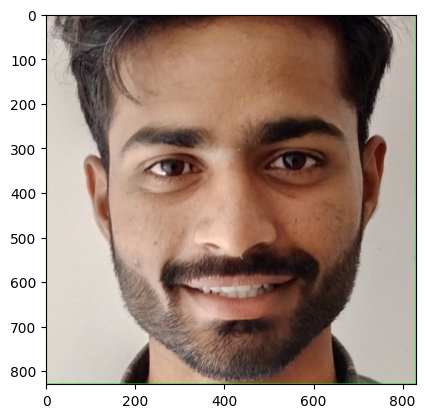

In [37]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




if __name__ == '__main__':
    facecrop('/content/Mahadevaswamy.png')

#Testing a file.

from keras.preprocessing import image
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # This line has been changed

import numpy as np
import matplotlib.pyplot as plt


file = '/content/capture.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()